## Logistic Regression

### import libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### Reading Dataset

In [17]:
dataset = pd.read_csv('heart.csv')
dataset = dataset.sample(frac=1).reset_index(drop = True) ##shuffing the dataframe
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
2,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
3,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
4,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
299,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
300,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
301,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


In [44]:
x = dataset[dataset.columns[:-1]].to_numpy() #independent variables
y = dataset[dataset.columns[-1]].to_numpy() #dependent variables
x.shape

(303, 13)

In [45]:
y = y[:,np.newaxis]
y.shape

(303, 1)

### Splitting Dataset

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2) #splitting the data in 80:20
print("Shape of \nX_train: {} \nX_test: {} \nY_train: {} \nY_test: {}".format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of 
X_train: (242, 13) 
X_test: (61, 13) 
Y_train: (242, 1) 
Y_test: (61, 1)


### Sigmoid Function

In [47]:
def sigmoid(z): #sigmoid function required for logistic regression
    return 1/(1+np.exp(-z))

### Weight and Bias Initialization

In [48]:
def init_weight_bias(dim): #initialize the weights and biases according to the required dimensions
    wt = np.zeros((dim,1))
    b = 0
    return wt,b

### Forward Propagation

In [51]:
def forward(x,y,w,b): #calculate the gradients and the cost on forward propagation
    m = x.shape[0]
    a = sigmoid(np.dot(x,w)+b)
    cost = -(1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a)) #computing the cost function or the error function
    dw = (1 / m) * np.dot(x.T, (a - y))   #this is derivative of the cost function with respect to w
    db = (1 / m) * np.sum(a - y)          #this is the derivative of the cost function with respect to b
    grads = {'dw': dw, 'db': db}          #these values are stored in a dictionary so as to access them later
    return grads, cost 

### Opitmizer

In [85]:
def optimize(x,y,w,b,iteration,lr,show_cost = True): #optimize the weights and biases
    costs = []
    for i in range(iteration):
        grads,cost = forward(x,y,w,b)
        dw = grads['dw']
        db = grads['db']
        w -= lr * dw
        b -= lr * db
        np.squeeze(cost)
        if i%500 == 0:
            costs.append(cost)
            if show_cost:
                print("cost after {} iterations :{}".format(i,cost))
    plt.plot(np.squeeze(costs),color='orange')
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate = " + str(lr))
    plt.show()
    params = {'w': w, 'b': db}                    #storing value in the dictionary for future access
    grads = {'dw': dw, 'db': db}                  #storing value in the dictionary for future access
    return params, grads, costs

### Prediction FUnction

In [86]:
def predict(w, b, x):
    m = x.shape[0]
    y_prediction = np.zeros((m, 1))
    A = sigmoid(np.dot(x, w) + b)
    for i in range(A.shape[0]):
        if (A[i, 0] <= 0.5):
            y_prediction[i, 0] = 0
        else:
            y_prediction[i, 0] = 1
            
    return y_prediction

### Summing up as model

In [87]:
def logistic_regression(X_train, X_test, y_train, y_test, num_iterations, learning_rate, print_cost = True):
    w, b = init_weight_bias(X_train.shape[1])
    parameters, grads, costs = optimize(X_train, y_train,w,b, num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    y_prediction_test = predict(w, b, X_test)
    y_prediction_train = predict(w, b, X_train)
    
    print('train accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print('test accuracy: {}'.format("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100)))
    
    d = {"costs": costs,
         "y_prediction_test": y_prediction_test, 
         "y_prediction_train" : y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

cost after 0 iterations :0.6931471805599453
cost after 500 iterations :0.9679736052485857
cost after 1000 iterations :0.9568059378919556
cost after 1500 iterations :0.9499027686133058
cost after 2000 iterations :0.9432626317335868
cost after 2500 iterations :0.9367641802972672
cost after 3000 iterations :0.9303584574983875
cost after 3500 iterations :0.9240201500923151
cost after 4000 iterations :0.917736057447954
cost after 4500 iterations :0.9114994171538602
cost after 5000 iterations :0.9053069293476338
cost after 5500 iterations :0.8991571611557575
cost after 6000 iterations :0.8930496822234703
cost after 6500 iterations :0.8869845935340716
cost after 7000 iterations :0.8809622694550685
cost after 7500 iterations :0.8749832159737406
cost after 8000 iterations :0.8690479925233784
cost after 8500 iterations :0.8631571687802468
cost after 9000 iterations :0.8573113008079657
cost after 9500 iterations :0.8515109179910388
cost after 10000 iterations :0.8457565160484669
cost after 10500 

cost after 86000 iterations :0.4292253412389955
cost after 86500 iterations :0.4284423113743966
cost after 87000 iterations :0.4276712818724145
cost after 87500 iterations :0.42691205363984097
cost after 88000 iterations :0.42616443046722396
cost after 88500 iterations :0.42542821901380934
cost after 89000 iterations :0.42470322879093675
cost after 89500 iterations :0.42398927214400683
cost after 90000 iterations :0.42328616423310533
cost after 90500 iterations :0.42259372301239057
cost after 91000 iterations :0.4219117692083273
cost after 91500 iterations :0.4212401262968601
cost after 92000 iterations :0.4205786204796148
cost after 92500 iterations :0.41992708065919787
cost after 93000 iterations :0.4192853384136765
cost after 93500 iterations :0.4186532279703213
cost after 94000 iterations :0.4180305861786621
cost after 94500 iterations :0.4174172524829474
cost after 95000 iterations :0.4168130688940463
cost after 95500 iterations :0.4162178799608749
cost after 96000 iterations :0.4

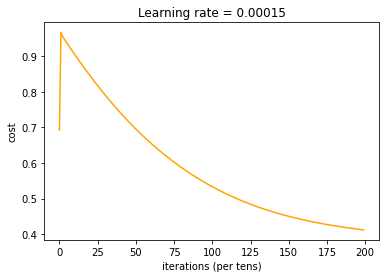

train accuracy: 80.57851239669421
test accuracy: test accuracy: 83.60655737704919 %


In [88]:
log_Reg = logistic_regression(x_train,x_test,y_train,y_test,num_iterations=100000,learning_rate=0.00015,print_cost=True)

### Overlap of Test data Labels and Prediction Labels

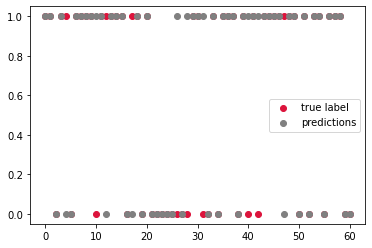

In [89]:
plt.scatter(range(len(y_test)),y_test,label='true label',color='crimson')
plt.scatter(range(len(log_Reg["y_prediction_test"])),log_Reg["y_prediction_test"],label='predictions',color='gray')
plt.legend()
plt.show()

### Thank you!!!